In [1]:
from construct import *
import matplotlib.pyplot as plt
import numpy as np

lengths_struct = Struct(
    "full_data_len" / Int32ul,
    "mid_data_len" / Int32ul,
    "peak_data_len" / Int32ul
)

data_sections = Struct(
    "full_x_data" / Array(this._root.lengths.full_data_len, Float32l),
    "full_y_data" / Array(this._root.lengths.full_data_len, Float32l),

    "mid_x_data" / Array(this._root.lengths.mid_data_len, Float32l),
    "mid_y_data" / Array(this._root.lengths.mid_data_len, Float32l),

    "peak_x_data" / Array(this._root.lengths.peak_data_len, Float32l),
    "peak_y_data" / Array(this._root.lengths.peak_data_len, Float32l),
)

test_struct = Struct(
    "lengths" / lengths_struct,
    "data_sects" / data_sections
)

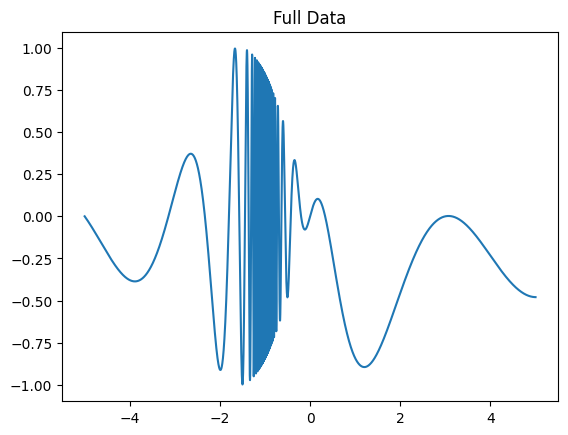

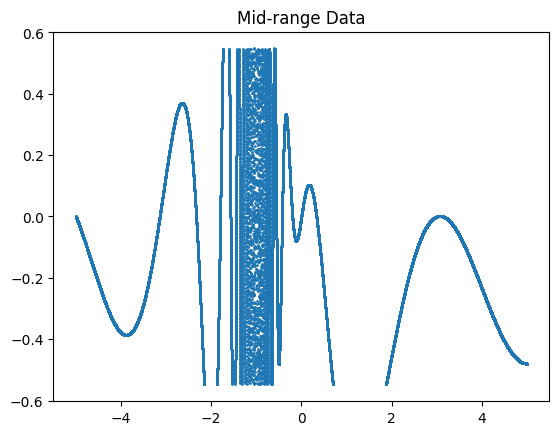

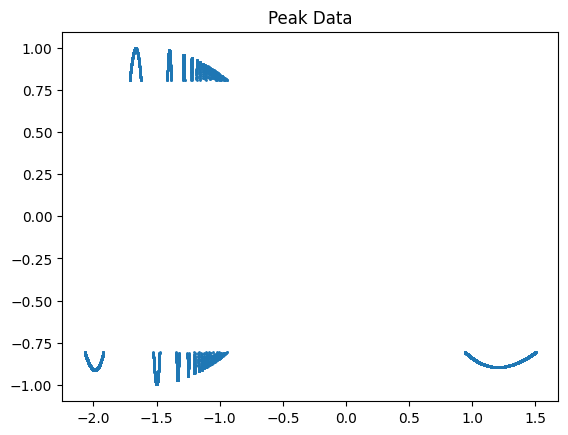

In [2]:
def parse_file(input_path):
  with open(input_path, 'rb') as input_f: # 'rb' ='read binary'
    raw_data = input_f.read()
    parsed_data = test_struct.parse(raw_data)

    # Select all relevant values
    full_x_data = parsed_data.data_sects.full_x_data
    full_y_data = parsed_data.data_sects.full_y_data

    mid_x_data = parsed_data.data_sects.mid_x_data
    mid_y_data = parsed_data.data_sects.mid_y_data

    peak_x_data = parsed_data.data_sects.peak_x_data
    peak_y_data = parsed_data.data_sects.peak_y_data

    # Plot all data
    plt.plot(full_x_data, full_y_data)
    plt.title("Full Data")
    plt.show()

    plt.scatter(mid_x_data, mid_y_data, s=1)
    plt.title("Mid-range Data")
    plt.show()

    plt.scatter(peak_x_data, peak_y_data, s=1)
    plt.title("Peak Data")
    plt.show()


input_path = "wave_data.test"
parse_file(input_path)